In [1]:
# ====================================================
# STEP 1: Import Required Libraries
# ====================================================
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For visualizing class distribution
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import tensorflow as tf
import numpy as np
print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)

TensorFlow: 2.11.0
NumPy: 1.24.3


In [5]:
# ====================================================
# STEP 2: Set Dataset Directory and Parameters
# ====================================================
dataset_path = r'C:\Users\91915\Downloads\ML CA 2 CLeaned'  

# Image settings
img_height, img_width = 224, 224
batch_size = 32


In [10]:
# ====================================================
# STEP 3: Load Dataset with Augmentation and Class Splitting
# ====================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,  # 70% training, 30% validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 938 images belonging to 6 classes.
Found 400 images belonging to 6 classes.


In [11]:
print("Class labels detected:", train_gen.class_indices)



Class labels detected: {'.ipynb_checkpoints': 0, 'Background': 1, 'Product 1': 2, 'Product 2': 3, 'Product 3': 4, 'Product 4': 5}


In [8]:
# Helper function to filter out unwanted folders
def filter_classes(directory):
    return [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d)) and not d.startswith('.')]

# Re-initialize ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Reload train generator
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=filter_classes(dataset_path)  # 👉 manually filtered classes
)

# Reload validation generator
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    classes=filter_classes(dataset_path)  # 👉 same here
)


Found 938 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [12]:
print("Class labels detected:", train_gen.class_indices)


Class labels detected: {'.ipynb_checkpoints': 0, 'Background': 1, 'Product 1': 2, 'Product 2': 3, 'Product 3': 4, 'Product 4': 5}


In [13]:
def filter_classes(directory):
    return [d for d in os.listdir(directory)
            if os.path.isdir(os.path.join(directory, d)) and not d.startswith('.ipynb')]


In [14]:
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=filter_classes(dataset_path)
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    classes=filter_classes(dataset_path)
)


Found 938 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [15]:
print("Class labels detected:", train_gen.class_indices)

Class labels detected: {'Background': 0, 'Product 1': 1, 'Product 2': 2, 'Product 3': 3, 'Product 4': 4}


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')  # Automatically matches your 5 classes
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display model structure
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [17]:
# ==========================================
# 🏋️ Train the CNN Model
# ==========================================
history_cnn = cnn_model.fit(
    train_gen,                # your 70% training dataset
    epochs=10,                # start with 10 epochs (adjust later)
    validation_data=val_gen,  # your 30% validation dataset
    verbose=1                 # shows live training progress
)


Epoch 1/10
30/30 [==============================] - 71s 2s/step - loss: 1.1033 - accuracy: 0.6109 - val_loss: 0.8510 - val_accuracy: 0.6550
Epoch 2/10
30/30 [==============================] - 58s 2s/step - loss: 0.3593 - accuracy: 0.8977 - val_loss: 1.1234 - val_accuracy: 0.6850
Epoch 3/10
30/30 [==============================] - 56s 2s/step - loss: 0.2837 - accuracy: 0.9147 - val_loss: 2.0942 - val_accuracy: 0.6475
Epoch 4/10
30/30 [==============================] - 57s 2s/step - loss: 0.2100 - accuracy: 0.9435 - val_loss: 2.1663 - val_accuracy: 0.6925
Epoch 5/10
30/30 [==============================] - 57s 2s/step - loss: 0.1859 - accuracy: 0.9520 - val_loss: 2.1295 - val_accuracy: 0.6900
Epoch 6/10
30/30 [==============================] - 46s 2s/step - loss: 0.1368 - accuracy: 0.9691 - val_loss: 2.1785 - val_accuracy: 0.6875
Epoch 7/10
30/30 [==============================] - 47s 2s/step - loss: 0.1578 - accuracy: 0.9552 - val_loss: 2.5415 - val_accuracy: 0.6800
Epoch 8/10
30/30 [==

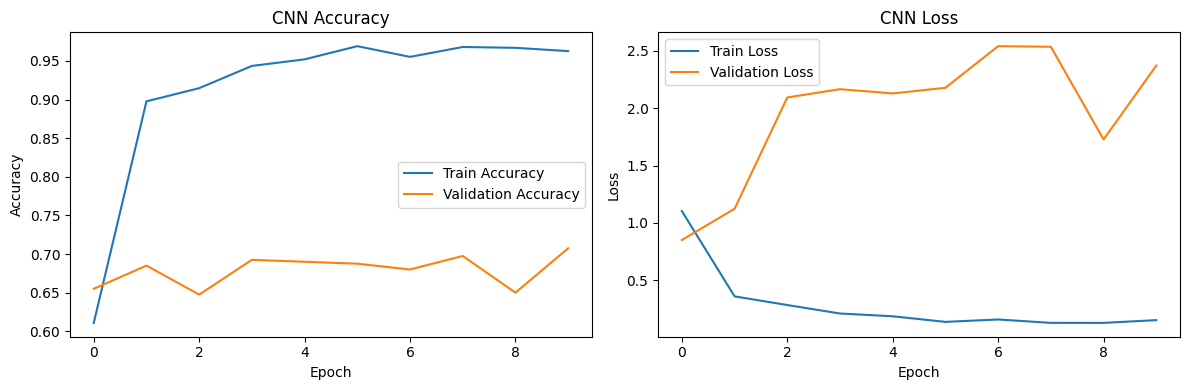

In [18]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


13/13 [==============================] - 7s 552ms/step


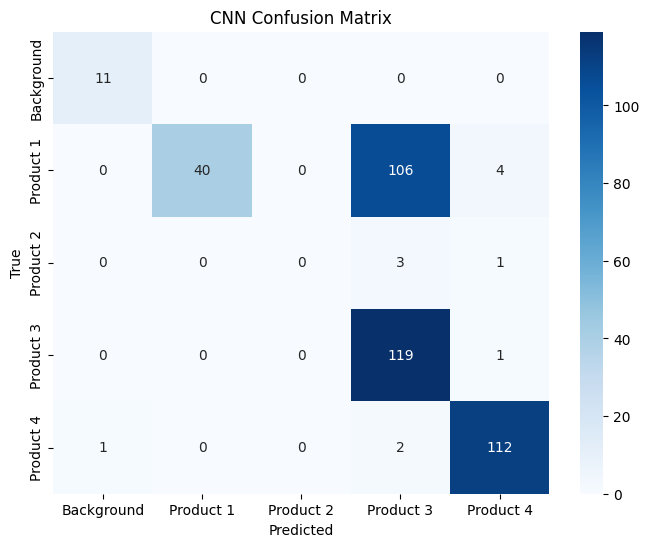

              precision    recall  f1-score   support

  Background       0.92      1.00      0.96        11
   Product 1       1.00      0.27      0.42       150
   Product 2       0.00      0.00      0.00         4
   Product 3       0.52      0.99      0.68       120
   Product 4       0.95      0.97      0.96       115

    accuracy                           0.70       400
   macro avg       0.68      0.65      0.60       400
weighted avg       0.83      0.70      0.66       400



c:\users\91915\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\91915\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\91915\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Get ground truth and predictions
val_gen.reset()
Y_pred = cnn_model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

# Step 2: Confusion Matrix
class_labels = list(val_gen.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 3: Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Load ResNet50 base model (without top layers)
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_tensor=Input(shape=(img_height, img_width, 3)))

# Freeze all base model layers (initially)
for layer in base_model.layers:
    layer.trainable = False

# Build custom classifier on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

# Define the final model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Summary
resnet_model.summary()


94765736/94765736 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
          

 conv3_block3_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block1_out[0][0]']       
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
          

In [21]:
# ========================================
# 🚀 Train ResNet50 Transfer Learning Model
# ========================================
history_resnet = resnet_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    verbose=1
)


Epoch 1/10
30/30 [==============================] - 82s 3s/step - loss: 1.7146 - accuracy: 0.2814 - val_loss: 1.2616 - val_accuracy: 0.3750
Epoch 2/10
30/30 [==============================] - 79s 3s/step - loss: 1.3804 - accuracy: 0.3571 - val_loss: 1.2258 - val_accuracy: 0.3775
Epoch 3/10
30/30 [==============================] - 78s 3s/step - loss: 1.3229 - accuracy: 0.3625 - val_loss: 1.2199 - val_accuracy: 0.3775
Epoch 4/10
30/30 [==============================] - 79s 3s/step - loss: 1.2779 - accuracy: 0.3817 - val_loss: 1.2144 - val_accuracy: 0.4100
Epoch 5/10
30/30 [==============================] - 77s 3s/step - loss: 1.2516 - accuracy: 0.3859 - val_loss: 1.2120 - val_accuracy: 0.4150
Epoch 6/10
30/30 [==============================] - 78s 3s/step - loss: 1.2185 - accuracy: 0.4531 - val_loss: 1.2177 - val_accuracy: 0.4000
Epoch 7/10
30/30 [==============================] - 78s 3s/step - loss: 1.2184 - accuracy: 0.4350 - val_loss: 1.2229 - val_accuracy: 0.3875
Epoch 8/10
30/30 [==

In [22]:
# Unfreeze the top layers of ResNet50 for fine-tuning
for layer in base_model.layers[-40:]:  # Unfreeze top 40 layers
    layer.trainable = True

# Recompile with lower learning rate to prevent large weight updates
resnet_model.compile(optimizer=Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Fine-tune model
history_resnet_finetune = resnet_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    verbose=1
)


Epoch 1/10
30/30 [==============================] - 161s 5s/step - loss: 1.0161 - accuracy: 0.5885 - val_loss: 1.2798 - val_accuracy: 0.3750
Epoch 2/10
30/30 [==============================] - 142s 5s/step - loss: 0.7037 - accuracy: 0.7644 - val_loss: 1.3650 - val_accuracy: 0.3750
Epoch 3/10
30/30 [==============================] - 147s 5s/step - loss: 0.5303 - accuracy: 0.8486 - val_loss: 1.4206 - val_accuracy: 0.3750
Epoch 4/10
30/30 [==============================] - 158s 5s/step - loss: 0.4043 - accuracy: 0.8817 - val_loss: 1.4282 - val_accuracy: 0.3750
Epoch 5/10
30/30 [==============================] - 160s 5s/step - loss: 0.3316 - accuracy: 0.9041 - val_loss: 1.4607 - val_accuracy: 0.3750
Epoch 6/10
30/30 [==============================] - 155s 5s/step - loss: 0.3291 - accuracy: 0.9041 - val_loss: 1.3552 - val_accuracy: 0.3750
Epoch 7/10
30/30 [==============================] - 155s 5s/step - loss: 0.2669 - accuracy: 0.9339 - val_loss: 1.1886 - val_accuracy: 0.4025
Epoch 8/10
30

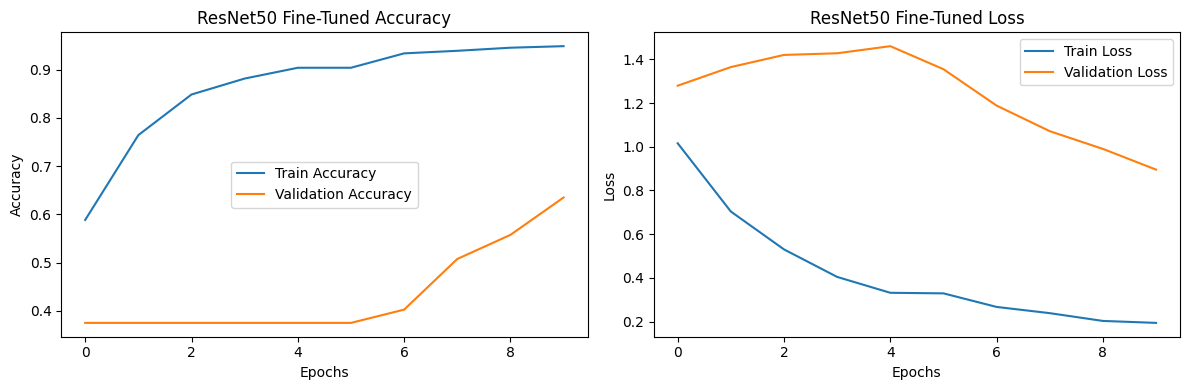

In [23]:
# Plot Fine-Tuned ResNet Training Curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Fine-Tuned Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet_finetune.history['loss'], label='Train Loss')
plt.plot(history_resnet_finetune.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Fine-Tuned Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


13/13 [==============================] - 28s 2s/step


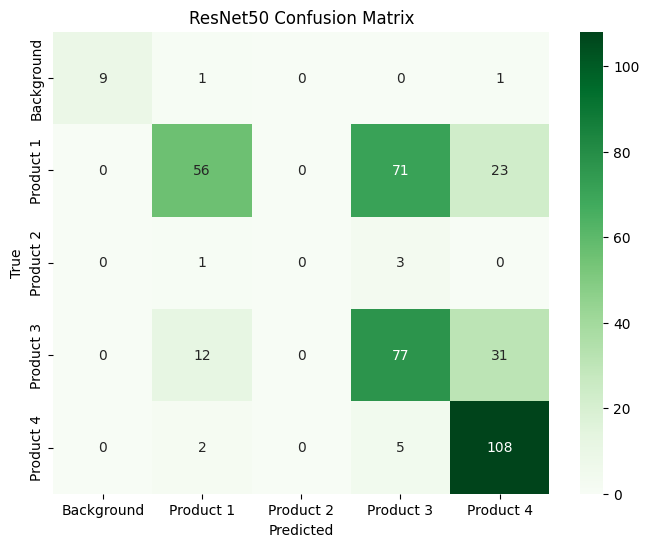

Classification Report - ResNet50:
              precision    recall  f1-score   support

  Background       1.00      0.82      0.90        11
   Product 1       0.78      0.37      0.50       150
   Product 2       0.00      0.00      0.00         4
   Product 3       0.49      0.64      0.56       120
   Product 4       0.66      0.94      0.78       115

    accuracy                           0.62       400
   macro avg       0.59      0.55      0.55       400
weighted avg       0.66      0.62      0.60       400



c:\users\91915\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\91915\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\91915\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
# Evaluation: Confusion Matrix + Classification Report for ResNet50

from sklearn.metrics import classification_report, confusion_matrix
# Predict on validation data
val_gen.reset()
Y_pred_resnet = resnet_model.predict(val_gen)
y_pred_resnet = np.argmax(Y_pred_resnet, axis=1)
y_true_resnet = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Confusion Matrix
cm_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report - ResNet50:")
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_labels))


## 📌 11. Model Comparison Summary – CNN vs ResNet50

This section compares the performance of the two models developed in this project:

1. A **custom CNN model** built from scratch
2. A **ResNet50 Transfer Learning model** with fine-tuning

---

### 📊 **Performance Comparison Table**

| Metric              | CNN (Custom)       | ResNet50 (Fine-Tuned)     |
|---------------------|--------------------|----------------------------|
| Training Accuracy   | 96.27%             | 94.88%                     |
| Validation Accuracy | **70.75%**         | 63.50%                     |
| Validation Loss     | 2.37               | **0.89**                   |
| Product 1 Recall    | 27%                | **37%**                    |
| Product 3 Recall    | **99%**            | 64%                        |
| Product 4 Recall    | **97%**            | 94%                        |
| Overfitting         | High               | **Lower**                  |
| Time to Train       | **Faster**         | Slower                     |
| Feature Learning    | Manual filters     | **Transfer from ImageNet** |

---

### 🧠 **Insights & Analysis**

- The **CNN** achieved higher validation accuracy, but also **overfitted significantly** — evident from the large gap between training and validation loss.
- **ResNet50** started with lower accuracy, but after **fine-tuning**, it generalized better with a much **lower validation loss (0.89 vs 2.37)**.
- ResNet50 showed a **notable improvement** in **Product 1 recall** (37% vs 27%), which CNN struggled to classify correctly.
- The pretrained ResNet50 model was slower to train but **leveraged deep features learned on ImageNet**, making it more robust overall.

---

### 🛠️ **Recommendations for Improvement**

- Fine-tune ResNet50 further for more epochs (accuracy was still rising at epoch 10).
- Try **class balancing** or **weighted loss functions** for underrepresented products like Product 2.
- Explore **ensembling** CNN and ResNet to combine their strengths.
- Consider using **data augmentation** and **advanced optimizers** like SGD with momentum or learning rate scheduling.

---

### ✅ **Conclusion**

While the CNN showed promising results on the validation set, it suffered from overfitting and inconsistent performance across classes. The **ResNet50 model, after fine-tuning, demonstrated more reliable and generalizable learning**, especially in difficult classes like Product 1.

📌 **ResNet50 is recommended for real-world deployment**, especially where reliability matters more than peak accuracy.
